### Faculdade de Engenharia Industrial - FEI

### Centro Universitário da Fundação Educacional Inaciana "Padre Sabóia de Medeiros" (FEI)


*FEI's Stricto Sensu Graduate Program in Electrical Engineering*

Concentration area: ARTIFICIAL INTELLIGENCE APPLIED TO AUTOMATION AND ROBOTICS

Master's thesis student Andre Luiz Florentino

***

# Chapter 7: Compile the results

***

## Importe modules

In [1]:
import os
import warnings

import pandas     as pd
import seaborn    as sns
import numpy      as np

from matplotlib  import pyplot  as plt

warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', 9)
pd.set_option('display.width', 300)
pd.set_option('display.max_colwidth', 120)

cmap_cm   = plt.cm.Blues
sns.set_style("darkgrid")

In [2]:
# Globals
current_path  = os.getcwd()
path_analysis = os.path.join(current_path, "_analysis")

# Check if the folder exists, if not, create it
if not os.path.exists(path_analysis):
    os.makedirs(path_analysis)

# For the picture names
pic_first_name = '07_Compile_results_'

## Loading the results


In [3]:
# Select the dataset

opc = 0
while str(opc) not in '1234':
    print()
    print("1-) ESC-10")
    print("2-) BDLib2")
    print("3-) US8K")
    print("4-) US8K_AV")


    opc = input("\nSelect the dataset: ")
    if opc.isdigit():
        opc = int(opc)
    else:
        opc = 0

if opc == 1:

    path        = os.path.join(current_path, "_dataset", "ESC-10")
    path_models = os.path.join(current_path, "ESC-10_saved_models")
    nom_dataset = 'ESC-10' 
    fold        = '1'
    
    
if opc == 2:
    
    path        = os.path.join(current_path, "_dataset", "BDLib2")
    path_models = os.path.join(current_path, "BDLib2_saved_models")
    nom_dataset = 'BDLib2' 
    fold        = 'fold-1'

    
if opc == 3:
    
    path        = os.path.join(current_path, "_dataset", "US8K")
    path_models = os.path.join(current_path, "US8K_saved_models")
    nom_dataset = 'US8K' 
    fold        = '1'

    
if opc == 4:

    path        = os.path.join(current_path, "_dataset", "US8K_AV")
    path_models = os.path.join(current_path, "US8K_AV_saved_models")
    nom_dataset = 'US8K_AV' 
    fold        = '1'


1-) ESC-10
2-) BDLib2
3-) US8K
4-) US8K_AV

Select the dataset: 4


In [4]:
def get_next_file_number(folder: str):
    files = [f for f in os.listdir(folder) if os.path.isfile(os.path.join(folder, f)) and f.startswith(pic_first_name)]
    if not files:
        return 1
    else:
        numbers = [int(f.split('.')[0].split('_')[-1]) for f in files]
        return max(numbers) + 1

In [5]:
files = [f for f in os.listdir(path_models) if f.endswith('.csv') and f.startswith(nom_dataset) and f.endswith('_no_cm.csv')]
files

['US8K_AV_metrics_set_CNN_2D_augmented_no_cm.csv',
 'US8K_AV_metrics_set_CNN_2D_original_no_cm.csv',
 'US8K_AV_metrics_set_CNN_2D_windowed_no_cm.csv',
 'US8K_AV_metrics_set_NN_norm_augmented_no_cm.csv',
 'US8K_AV_metrics_set_NN_norm_original_no_cm.csv',
 'US8K_AV_metrics_set_NN_norm_PCA_augmented_no_cm.csv',
 'US8K_AV_metrics_set_NN_norm_PCA_original_no_cm.csv',
 'US8K_AV_metrics_set_NN_norm_PCA_windowed_no_cm.csv',
 'US8K_AV_metrics_set_NN_norm_windowed_no_cm.csv',
 'US8K_AV_metrics_set_NN_std_augmented_no_cm.csv',
 'US8K_AV_metrics_set_NN_std_original_no_cm.csv',
 'US8K_AV_metrics_set_NN_std_PCA_augmented_no_cm.csv',
 'US8K_AV_metrics_set_NN_std_PCA_original_no_cm.csv',
 'US8K_AV_metrics_set_NN_std_PCA_windowed_no_cm.csv',
 'US8K_AV_metrics_set_NN_std_windowed_no_cm.csv',
 'US8K_AV_metrics_set_norm_augmented_no_cm.csv',
 'US8K_AV_metrics_set_norm_mutual_augmented_no_cm.csv',
 'US8K_AV_metrics_set_norm_mutual_original_no_cm.csv',
 'US8K_AV_metrics_set_norm_mutual_windowed_no_cm.csv',


In [6]:
files[0]

'US8K_AV_metrics_set_CNN_2D_augmented_no_cm.csv'

In [7]:
batch_type = files[0].split(f'{nom_dataset}_metrics_set_CNN_2D_')[1].split('_no_cm.csv')[0]
batch_type

'augmented'

In [8]:
db = pd.read_csv(os.path.join(path_models, files[0]), sep='\t')
db = db.drop('Unnamed: 0', axis=1)
db.insert(0, 'batch_type', batch_type)
db

,batch_type,index,Model,Fold,...,Precision(Val),Recall(Train),Recall(Val),Process_time
0,augmented,17,Model_CNN_2D_Luz,8,...,0.795126,1.000000,0.769231,1906.250
1,augmented,3,Model_CNN_2D_Luz,10,...,0.854174,0.999953,0.845267,2312.500
2,augmented,9,Model_CNN_2D_Luz,4,...,0.861982,0.999903,0.851268,2562.500
3,augmented,15,Model_CNN_2D_Luz,7,...,0.858832,0.999438,0.857202,1718.750
4,augmented,11,Model_CNN_2D_Luz,5,...,0.881039,1.000000,0.869302,2593.750
5,augmented,13,Model_CNN_2D_Luz,6,...,0.885092,1.000000,0.884167,1687.500
6,augmented,19,Model_CNN_2D_Luz,9,...,0.892863,1.000000,0.892677,1781.250
7,augmented,7,Model_CNN_2D_Luz,3,...,0.898510,1.000000,0.892808,1750.000
8,augmented,1,Model_CNN_2D_Luz,1,...,0.899769,1.000000,0.896899,2156.250
9,augmented,5,Model_CNN_2D_Luz,2,...,0.907639,1.000000,0.903652,1859.375


In [9]:
db.dtypes

batch_type           object
index                 int64
Model                object
Fold                  int64
Accuracy(Train)     float64
Accuracy(Val)       float64
F1(Train)           float64
F1(Val)             float64
Precision(Train)    float64
Precision(Val)      float64
Recall(Train)       float64
Recall(Val)         float64
Process_time        float64
dtype: object

In [10]:
db = db.drop(['Fold', 'index'], axis=1)

new_db = db.groupby(['Model', 'batch_type']).agg(['mean', 'std'])

In [11]:
new_db

Accuracy(Train)           Accuracy(Val)            ... Recall(Val)           Process_time            
                                       mean       std          mean       std  ...        mean       std         mean         std
Model            batch_type                                                    ...                                               
Model_CNN_2D_Luz augmented         0.999929  0.000176      0.866247  0.039766  ...    0.866247  0.039766    2032.8125  348.954446
Model_CNN_2D_Su  augmented         0.999576  0.000384      0.844084  0.042700  ...    0.844084  0.042700    1010.9375  159.012046

[2 rows x 18 columns]

In [12]:
def compile_results(path: str):
    
    files = [f for f in os.listdir(path) if f.endswith('.csv') and f.startswith(nom_dataset) and f.endswith('_no_cm.csv')]

    db_list = []
    extracted_parts = []
    total_samples = 0
    
    for file in files:
        print(file)
        db = pd.read_csv(os.path.join(path_models, file), sep='\t')
        db = db.drop('Unnamed: 0', axis=1)
        samples = int(len(db))
        print(f'Samples: {samples}')
        total_samples = total_samples + samples
        
        cols_to_rename = {'Accuracy(Val)': 'Accuracy(Validation)', 'F1(Val)': 'F1(Validation)',
                          'Precision(Val)': 'Precision(Validation)', 'Recall(Val)': 'Recall(Validation)'}
        db.rename(columns=cols_to_rename, inplace=True)

        db_list.append(db) 
    
        if "_metrics_set_CNN_2D_" in file:
            parts = file.split("_metrics_set_CNN_2D_")[1].split("_")
        elif "_metrics_set_NN_" in file:
            parts = file.split("_metrics_set_NN_")[1].split("_")
        elif "_metrics_set_" in file:
            parts = file.split("_metrics_set_")[1].split("_")

        extracted_part = "_".join(parts[:-2])
        extracted_parts.append(extracted_part)
        print(extracted_part)
        
        db.insert(0, 'batch_type', extracted_part)
        print("===================================================================")
    print(len(extracted_parts))
    print(total_samples)
    print(len(db_list))
    return pd.concat(db_list, ignore_index=True)  

In [13]:
DB = compile_results(path_models)
DB

US8K_AV_metrics_set_CNN_2D_augmented_no_cm.csv
Samples: 20
augmented
US8K_AV_metrics_set_CNN_2D_original_no_cm.csv
Samples: 20
original
US8K_AV_metrics_set_CNN_2D_windowed_no_cm.csv
Samples: 20
windowed
US8K_AV_metrics_set_NN_norm_augmented_no_cm.csv
Samples: 20
norm_augmented
US8K_AV_metrics_set_NN_norm_original_no_cm.csv
Samples: 20
norm_original
US8K_AV_metrics_set_NN_norm_PCA_augmented_no_cm.csv
Samples: 20
norm_PCA_augmented
US8K_AV_metrics_set_NN_norm_PCA_original_no_cm.csv
Samples: 20
norm_PCA_original
US8K_AV_metrics_set_NN_norm_PCA_windowed_no_cm.csv
Samples: 20
norm_PCA_windowed
US8K_AV_metrics_set_NN_norm_windowed_no_cm.csv
Samples: 20
norm_windowed
US8K_AV_metrics_set_NN_std_augmented_no_cm.csv
Samples: 20
std_augmented
US8K_AV_metrics_set_NN_std_original_no_cm.csv
Samples: 20
std_original
US8K_AV_metrics_set_NN_std_PCA_augmented_no_cm.csv
Samples: 20
std_PCA_augmented
US8K_AV_metrics_set_NN_std_PCA_original_no_cm.csv
Samples: 20
std_PCA_original
US8K_AV_metrics_set_NN_std_

,batch_type,index,Model,Fold,...,Precision(Validation),Recall(Train),Recall(Validation),Process_time
0,augmented,17,Model_CNN_2D_Luz,8,...,0.795126,1.000000,0.769231,1906.250
1,augmented,3,Model_CNN_2D_Luz,10,...,0.854174,0.999953,0.845267,2312.500
2,augmented,9,Model_CNN_2D_Luz,4,...,0.861982,0.999903,0.851268,2562.500
3,augmented,15,Model_CNN_2D_Luz,7,...,0.858832,0.999438,0.857202,1718.750
4,augmented,11,Model_CNN_2D_Luz,5,...,0.881039,1.000000,0.869302,2593.750
...,...,...,...,...,...,...,...,...,...
1045,std_windowed,53,Voting,8,...,0.759407,0.932892,0.729670,53109.375
1046,std_windowed,41,Voting,6,...,0.796778,0.931784,0.746786,51328.125
1047,std_windowed,59,Voting,9,...,0.813463,0.931708,0.785714,49406.250
1048,std_windowed,5,Voting,1,...,0.813300,0.930754,0.787375,54765.625


In [14]:
sort_order = ['original', 'augmented', 'windowed',
              'norm_original', 'norm_mutual_original', 'norm_PCA_original', 'norm_augmented', 
              'norm_mutual_augmented', 'norm_PCA_augmented', 'norm_windowed', 'norm_mutual_windowed',
              'norm_PCA_windowed', 'std_original', 'std_PCA_original', 
              'std_augmented', 'std_PCA_augmented', 'std_windowed', 'std_PCA_windowed']

DB['batch_type'] = pd.Categorical(DB['batch_type'], categories=sort_order, ordered=True)

DB     = DB.drop(['Fold', 'index'], axis=1)
new_DB = DB.groupby(['Model', 'batch_type']).agg(['mean', 'std']).sort_values('batch_type')

In [15]:
new_DB

Accuracy(Train)           Accuracy(Validation)            ... Recall(Validation)           Process_time            
                                            mean       std                 mean       std  ...               mean       std         mean         std
Model           batch_type                                                                 ...                                                      
ANN             original                     NaN       NaN                  NaN       NaN  ...                NaN       NaN          NaN         NaN
SVC             original                     NaN       NaN                  NaN       NaN  ...                NaN       NaN          NaN         NaN
Voting          original                     NaN       NaN                  NaN       NaN  ...                NaN       NaN          NaN         NaN
Model_CNN_2D_Su original                0.988501  0.008817             0.824859  0.051463  ...           0.824859  0.051463     239.0625   87.787845
Forest          original                     NaN       NaN                  NaN       NaN  ...                NaN       NaN          NaN         NaN
...                                          ...       ...                  ...       ...  ...                ...       ...          ...         ...
                std_PCA_windowed        1.000000  0.000000             0.743999  0.046325  ...           0.743999  0.046325     951.5625   89.440899
CNN_1D          std_PCA_windowed        0.999713  0.000182             0.760564  0.030913  ...           0.760564  0.030913     423.4375  212.005399
ANN             std_PCA_windowed        1.000000  0.000000             0.779608  0.031570  ...           0.779608  0.031570      81.2500   26.352314
SVC             std_PCA_windowed        0.885938  0.001950             0.761740  0.016176  ...           0.761740  0.016176    5264.0625  618.387327
Voting          std_PCA_windowed        0.918449  0.001532             0.734093  0.034210  ...           0.734093  0.034210   10965.6250  911.675569

[180 rows x 18 columns]

In [16]:
new_DB = new_DB.dropna(how="all")
new_DB

Accuracy(Train)           Accuracy(Validation)            ... Recall(Validation)           Process_time            
                                             mean       std                 mean       std  ...               mean       std         mean         std
Model            batch_type                                                                 ...                                                      
Model_CNN_2D_Su  original                0.988501  0.008817             0.824859  0.051463  ...           0.824859  0.051463     239.0625   87.787845
Model_CNN_2D_Luz original                0.998273  0.002493             0.832517  0.031004  ...           0.832517  0.031004     468.7500  132.582521
                 augmented               0.999929  0.000176             0.866247  0.039766  ...           0.866247  0.039766    2032.8125  348.954446
Model_CNN_2D_Su  augmented               0.999576  0.000384             0.844084  0.042700  ...           0.844084  0.042700    1010.9375  159.012046
Model_CNN_2D_Luz windowed                0.999650  0.000559             0.797915  0.039950  ...           0.797915  0.039950     732.8125  122.246141
...                                           ...       ...                  ...       ...  ...                ...       ...          ...         ...
Forest           std_PCA_windowed        1.000000  0.000000             0.743999  0.046325  ...           0.743999  0.046325     951.5625   89.440899
CNN_1D           std_PCA_windowed        0.999713  0.000182             0.760564  0.030913  ...           0.760564  0.030913     423.4375  212.005399
ANN              std_PCA_windowed        1.000000  0.000000             0.779608  0.031570  ...           0.779608  0.031570      81.2500   26.352314
SVC              std_PCA_windowed        0.885938  0.001950             0.761740  0.016176  ...           0.761740  0.016176    5264.0625  618.387327
Voting           std_PCA_windowed        0.918449  0.001532             0.734093  0.034210  ...           0.734093  0.034210   10965.6250  911.675569

[105 rows x 18 columns]

In [17]:
new_DB_reset = new_DB.reset_index()

top_accuracies = new_DB_reset[('Accuracy(Validation)', 'mean')].groupby(new_DB_reset['Model']).nlargest(1).reset_index()

merged = pd.merge(top_accuracies, new_DB_reset, on=['Model', ('Accuracy(Validation)', 'mean')], how='left')

result = merged[[('Model',     ''), ('batch_type',     ''), ('Accuracy(Validation)', 'mean'), ('Accuracy(Validation)', 'std')]]

result_sorted = result.sort_values(by=[('Accuracy(Validation)', 'mean')], ascending=False)

In [18]:
# Highest averaged accuracy per model

result_sorted.style.background_gradient(cmap = cmap_cm)

In [19]:
model = 'ANN'
data = new_DB.loc[model]
data

Accuracy(Train)           Accuracy(Validation)            ... Recall(Validation)           Process_time           
                              mean       std                 mean       std  ...               mean       std         mean        std
batch_type                                                                   ...                                                     
norm_original             0.997260  0.003772             0.827989  0.027817  ...           0.827989  0.027817      32.8125  17.195390
norm_PCA_original         0.996639  0.005432             0.823056  0.029122  ...           0.823056  0.029122      39.0625  11.048543
norm_augmented            0.999995  0.000015             0.828974  0.042736  ...           0.828974  0.042736      85.9375  18.414239
norm_PCA_augmented        0.999995  0.000015             0.820873  0.030260  ...           0.820873  0.030260      84.3750  27.756068
norm_windowed             0.999979  0.000066             0.788341  0.029858  ...           0.788341  0.029858     109.3750  37.557826
norm_PCA_windowed         1.000000  0.000000             0.782560  0.025293  ...           0.782560  0.025293      92.1875  25.989531
std_original              0.999404  0.001213             0.824339  0.032872  ...           0.824339  0.032872      42.1875  26.608416
std_PCA_original          0.998706  0.003798             0.820624  0.030212  ...           0.820624  0.030212      35.9375  10.546071
std_augmented             1.000000  0.000000             0.824858  0.032968  ...           0.824858  0.032968     135.9375  33.794017
std_PCA_augmented         1.000000  0.000000             0.823106  0.032386  ...           0.823106  0.032386      87.5000  32.274861
std_windowed              1.000000  0.000000             0.784206  0.032837  ...           0.784206  0.032837     103.1250  67.588034
std_PCA_windowed          1.000000  0.000000             0.779608  0.031570  ...           0.779608  0.031570      81.2500  26.352314

[12 rows x 18 columns]

In [20]:
data = new_DB.loc['ANN'].reset_index()
data

batch_type Accuracy(Train)           Accuracy(Validation)  ... Recall(Validation)           Process_time           
                                  mean       std                 mean  ...               mean       std         mean        std
0        norm_original        0.997260  0.003772             0.827989  ...           0.827989  0.027817      32.8125  17.195390
1    norm_PCA_original        0.996639  0.005432             0.823056  ...           0.823056  0.029122      39.0625  11.048543
2       norm_augmented        0.999995  0.000015             0.828974  ...           0.828974  0.042736      85.9375  18.414239
3   norm_PCA_augmented        0.999995  0.000015             0.820873  ...           0.820873  0.030260      84.3750  27.756068
4        norm_windowed        0.999979  0.000066             0.788341  ...           0.788341  0.029858     109.3750  37.557826
5    norm_PCA_windowed        1.000000  0.000000             0.782560  ...           0.782560  0.025293      92.1875  25.989531
6         std_original        0.999404  0.001213             0.824339  ...           0.824339  0.032872      42.1875  26.608416
7     std_PCA_original        0.998706  0.003798             0.820624  ...           0.820624  0.030212      35.9375  10.546071
8        std_augmented        1.000000  0.000000             0.824858  ...           0.824858  0.032968     135.9375  33.794017
9    std_PCA_augmented        1.000000  0.000000             0.823106  ...           0.823106  0.032386      87.5000  32.274861
10        std_windowed        1.000000  0.000000             0.784206  ...           0.784206  0.032837     103.1250  67.588034
11    std_PCA_windowed        1.000000  0.000000             0.779608  ...           0.779608  0.031570      81.2500  26.352314

[12 rows x 19 columns]

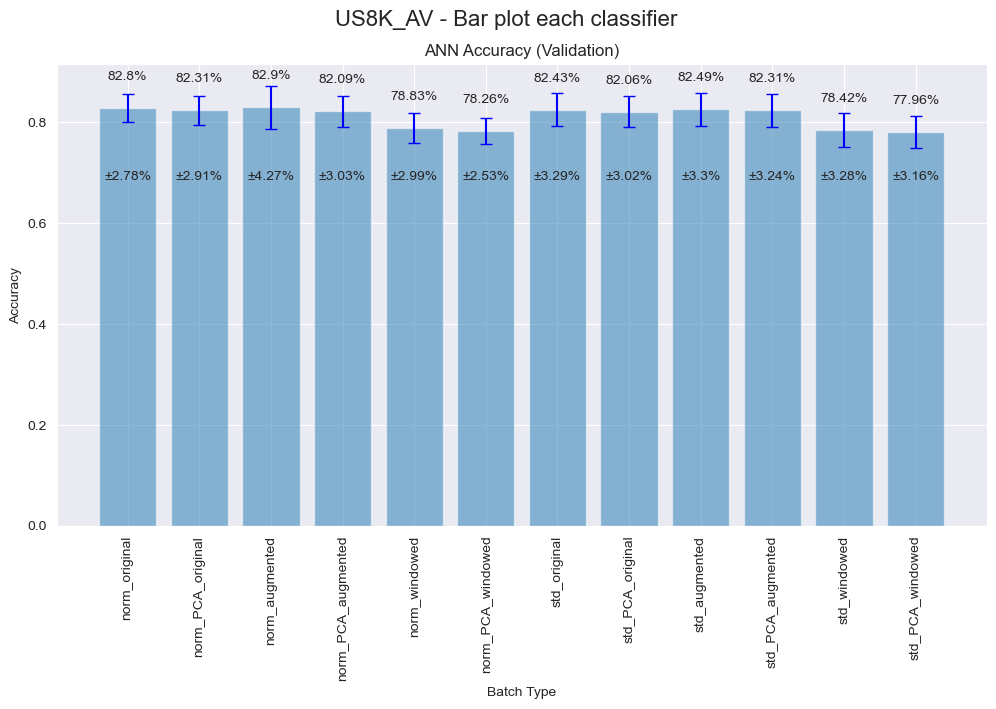

In [21]:
# Reset index for easier plotting
data = new_DB.loc['ANN'].reset_index()

plt.figure(figsize=(12,6))
plt.suptitle(f'{nom_dataset} - Bar plot each classifier', fontsize = 16,  y=0.97)

# Create a bar plot of mean accuracy with error bars representing standard deviation
plt.bar(data['batch_type'], data[('Accuracy(Validation)', 'mean')], 
        yerr=data[('Accuracy(Validation)', 'std')], capsize=4,
        alpha=0.5, ecolor='blue')

# Add title and labels
plt.title(f'{model} Accuracy (Validation)')
plt.xlabel('Batch Type')
plt.ylabel('Accuracy')

min_y = data[('Accuracy(Validation)', 'mean')].min() - 0.1

# Add accuracy values on the plot
for x, y in zip(data.index, data[('Accuracy(Validation)', 'mean')]):
    plt.text(x, y + 0.05, f'{str(round(y*100, 2))}%', ha='center', va='bottom')
    
for x, y in zip(data.index, data[('Accuracy(Validation)', 'std')]):
    plt.text(x, min_y , f'±{str(round(y*100, 2))}%', ha='center', va='bottom')

# Rotate x labels for better readability
plt.xticks(rotation=90)

# Show the plot
plt.show()


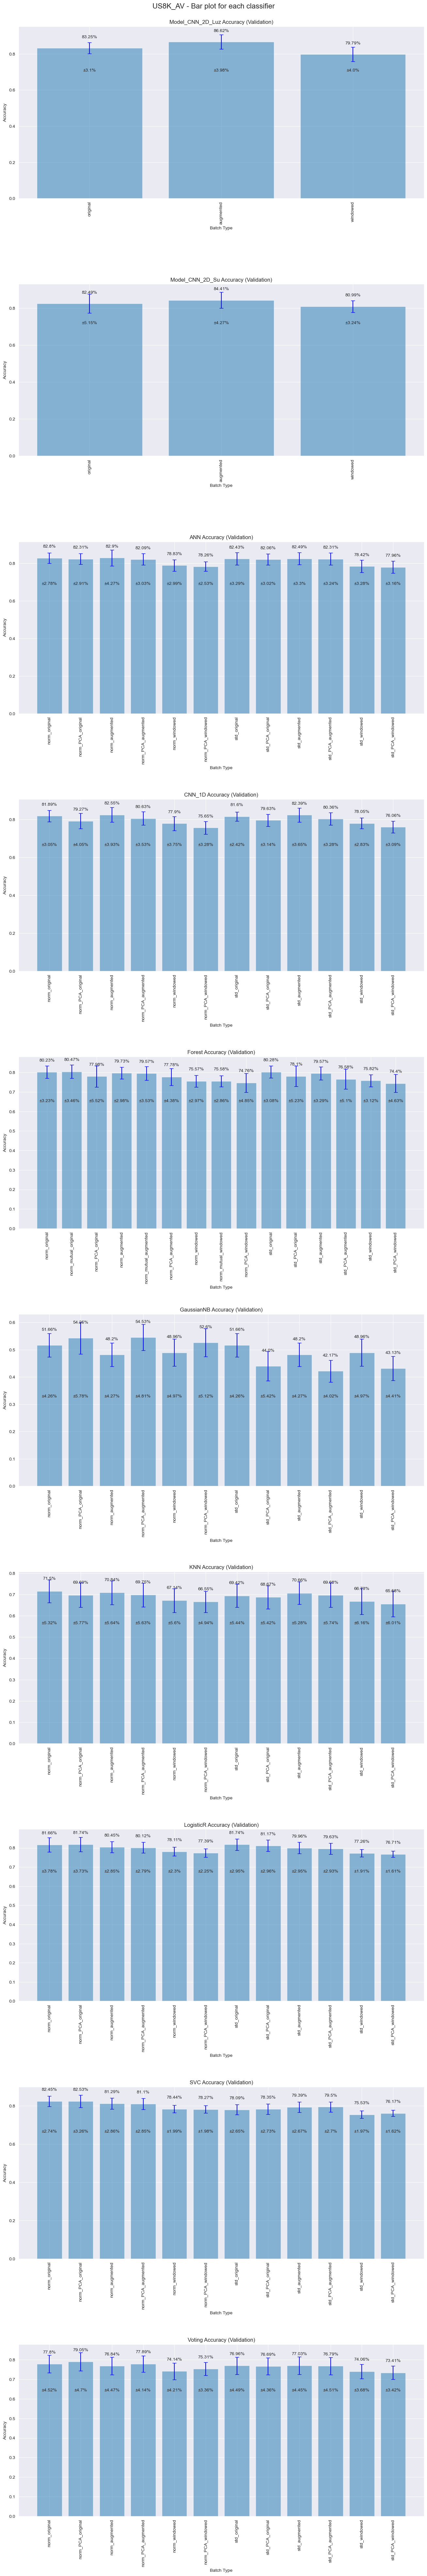

In [22]:
models = DB['Model'].unique()

n_rows = len(models)

fig, axs = plt.subplots(n_rows, 1, figsize=(14,8*n_rows))
plt.suptitle(f'{nom_dataset} - Bar plot for each classifier', fontsize = 16,  y=0.99)

for idx, model in enumerate(models):
    data = new_DB.loc[model].reset_index()

    axs[idx].bar(data['batch_type'], data[('Accuracy(Validation)', 'mean')], 
                 yerr=data[('Accuracy(Validation)', 'std')], capsize=4,
                 alpha=0.5, ecolor='blue')

    axs[idx].set_title(f'{model} Accuracy (Validation)')
    axs[idx].set_xlabel('Batch Type')
    axs[idx].set_ylabel('Accuracy')

    min_y = data[('Accuracy(Validation)', 'mean')].min() - 0.1

    for x, y in zip(data.index, data[('Accuracy(Validation)', 'mean')]):
        axs[idx].text(x, y + 0.05, f'{str(round(y*100, 2))}%', ha='center', va='bottom')

    for x, y in zip(data.index, data[('Accuracy(Validation)', 'std')]):
        axs[idx].text(x, min_y , f'±{str(round(y*100, 2))}%', ha='center', va='bottom')

    axs[idx].set_xticks(data.index)
    axs[idx].set_xticklabels(data['batch_type'], rotation=90)

plt.tight_layout(pad=4.0)
picture_name = f'{pic_first_name}{nom_dataset}_{get_next_file_number(path_analysis):02d}.png'
plt.savefig(os.path.join(path_analysis, picture_name))

In [23]:
for batch in np.unique(DB['batch_type']):
    print(batch)
    DB[DB['batch_type'] == batch]

augmented
norm_PCA_augmented
norm_PCA_original
norm_PCA_windowed
norm_augmented
norm_mutual_augmented
norm_mutual_original
norm_mutual_windowed
norm_original
norm_windowed
original
std_PCA_augmented
std_PCA_original
std_PCA_windowed
std_augmented
std_original
std_windowed
windowed


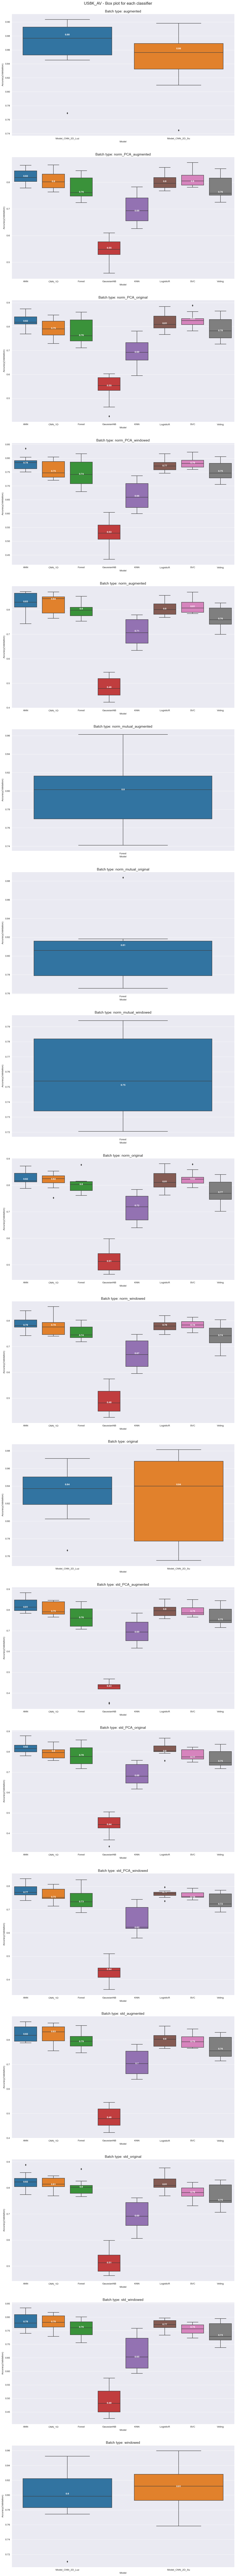

In [24]:
n_batches = len(np.unique(DB['batch_type']))
fig, axs = plt.subplots(n_batches, figsize=(14,8*n_batches))
plt.suptitle(f'{nom_dataset} - Box plot for each classifier', fontsize = 16, y=0.994)

for i, batch in enumerate(np.unique(DB['batch_type'])):
    dbPlot = DB[DB['batch_type'] == batch]
    
    axs[i].set_title(f'Batch type: {batch}', fontsize = 14)
    box_plot = sns.boxplot(data=dbPlot, x="Model", y="Accuracy(Validation)", showfliers = True, ax=axs[i])

    medians = list(dbPlot.groupby(['Model'], sort=False)['Accuracy(Validation)'].median())
    medians = [round(element, 2) for element in medians]

    vertical_offset = dbPlot['Accuracy(Validation)'].median()*0.001  # offset from median for display

    for xtick in box_plot.get_xticks():
        box_plot.text(xtick, medians[xtick] + vertical_offset, medians[xtick], 
                horizontalalignment='center',size='medium',color='w',weight='semibold')

plt.tight_layout(pad=4.0)
picture_name = f'{pic_first_name}{nom_dataset}_{get_next_file_number(path_analysis):02d}.png'
plt.savefig(os.path.join(path_analysis, picture_name))

# End of the notebook

# 

# 

# 